### Student Information
Name: Jansen Reynaldi Gautama 劉其生

Student ID: 109006240

GitHub ID: GukGuk25

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# 2nd

## 1. Data Preparation

In [22]:
#load data
fh = open("sentiment_labelled_sentences\\amazon_cells_labelled.txt", "r")
fh1 = open("sentiment_labelled_sentences\imdb_labelled.txt", "r")
fh2 = open("sentiment_labelled_sentences\yelp_labelled.txt", "r")

#combine
fhmaster = fh.read() + fh1.read() + fh2.read()

#closehandler
fh.close()
fh1.close()
fh2.close()


#check and remove blanks
print(len(fhmaster.split("\n")))
fhmaster = fhmaster.split("\n")
print(fhmaster[3000])
fhmaster.pop()
print(len(fhmaster))



#split into 2 list for now on foward text is sentence and flag is score XD
text, flag = [], []

for el in fhmaster :
    temp = el.split("\t")
    text.append(temp[0])
    flag.append(temp[1])
print(text)
print(flag)


3001

3000
['So there is no way for me to plug it in here in the US unless I go by a converter.', 'Good case, Excellent value.', 'Great for the jawbone.', 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!', 'The mic is great.', 'I have to jiggle the plug to get it to line up right to get decent volume.', 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.', 'If you are Razr owner...you must have this!', 'Needless to say, I wasted my money.', 'What a waste of money and time!.', 'And the sound quality is great.', 'He was very impressed when going from the original battery to the extended battery.', 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.', 'Very good quality though', 'The design is very odd, as the ear "clip" is not very comfortable at all.', 'Highly recommend for any one who has a blue tooth phone.', 'I advise EVERYONE DO

## 2. Data Transformation

In [23]:
import pandas as pd
import helpers.data_mining_helpers as dmh


#convert 2 array into 1 pandas df
X = pd.DataFrame(list(zip(text, flag)), columns= ['text','flag'])
X

,text,flag
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


## 3. Data Mining (Dealing with missing value and duplicate data)

In [24]:
#Check is there any missing value

print(X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=0)) #check horizontaly
print("============================================================================================")
print(X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)) #check vertically


                                 text                                flag
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object


In [25]:
#in this data set there are no missing value but just incase there are lets just proccess it although there will be no diffrences
X["text"] = X["text"].replace(['NaN', 'None', ''], None) #in case of bad string
X["flag"] = X["flag"].replace(['NaN', 'None', ''], None) #in case of bad string
X.dropna(inplace=True) #drop blank
print(len(X))

3000


In [26]:
#check duplicate
print(sum(X.duplicated())) #how many duplicate
print("\nLen =", len(X))
print(X[X.duplicated()]) #print duplicate

17

Len = 3000
                                                   text flag
285                                       Great phone!.    1
407                                        Works great.    1
524                                       Works great!.    1
543                             Don't buy this product.    0
744   If you like a loud buzzing to override all you...    0
748                                       Does not fit.    0
778                               This is a great deal.    1
792                                        Great Phone.    1
892                    Excellent product for the price.    1
896                                        Great phone.    1
1363                   Definitely worth checking out.      1
1585                                 Not recommended.      0
1788                                            10/10      1
2814                                 I love this place.    1
2816                             The food was terrible.    0
2843     

In [27]:
X.drop_duplicates(keep='first', inplace=True )#keep first data remove rest of duplicate, and directly modify


In [28]:
print(sum(X.duplicated())) #how many duplicate
print("\nLen =", len(X))
print(X[X.duplicated()]) #print duplicate
print(X)

0

Len = 2983
Empty DataFrame
Columns: [text, flag]
Index: []
                                                   text flag
0     So there is no way for me to plug it in here i...    0
1                           Good case, Excellent value.    1
2                                Great for the jawbone.    1
3     Tied to charger for conversations lasting more...    0
4                                     The mic is great.    1
...                                                 ...  ...
2995  I think food should have flavor and texture an...    0
2996                           Appetite instantly gone.    0
2997  Overall I was not impressed and would not go b...    0
2998  The whole experience was underwhelming, and I ...    0
2999  Then, as if I hadn't wasted enough of my life ...    0

[2983 rows x 2 columns]


## 4. Data Preprocessing

In [29]:
#do some sampling
print(X.shape)
X_sample = X.sample(n=1000,random_state=42)
display(X_sample)

(2983, 2)


,text,flag
2423,We've tried to like this place but after 10+ t...,0
1558,The script is a big flawed mess.,0
889,It was that loud.Glad to say that the Plantron...,1
332,The reception is excellent!,1
1850,Now imagine that every single one of those dec...,0
...,...,...
926,It looses connection to the phone even when it...,0
1221,There are the usual Hitchcock logic flaws.,0
2724,Awesome selection of beer.,1
2470,"Very good, though!",1


In [30]:
#check the ratio between 1 and 0 flag
X.flag.value_counts()
X_sample.flag.value_counts()

flag
0    506
1    494
Name: count, dtype: int64

<Axes: title={'center': 'flag distribution of X'}, xlabel='flag'>

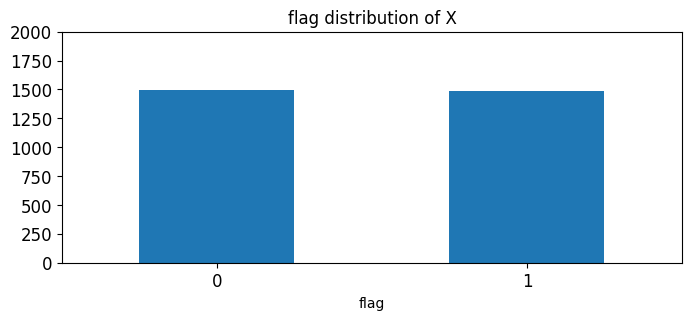

In [31]:
X.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X',
                                           ylim = [0, 2000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'flag distribution of X_sample'}, xlabel='flag'>

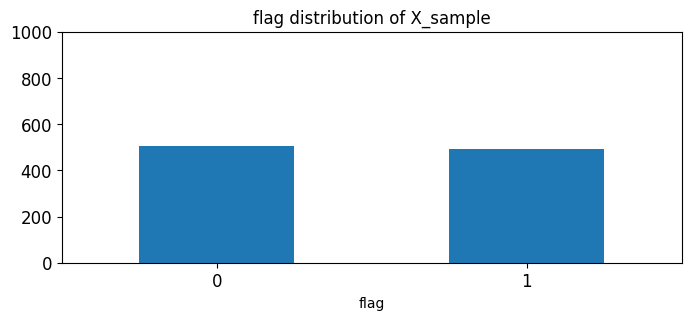

In [32]:
X_sample.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X_sample',
                                           ylim = [0, 1000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [33]:
#Feature Creation
import nltk
nltk.download('punkt')
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jansen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
X

,text,flag,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"
...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,..."


In [35]:
#Feature subset selection/extraction using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() #vectorize
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2983, 5159)
  (0, 4165)	1
  (0, 4549)	1
  (0, 2428)	1
  (0, 3045)	1
  (0, 4991)	1
  (0, 1830)	1
  (0, 2811)	1
  (0, 4613)	1
  (0, 3389)	1
  (0, 2434)	1
  (0, 2315)	2
  (0, 2159)	1
  (0, 4535)	1
  (0, 4839)	1
  (0, 4797)	1
  (0, 1983)	1
  (0, 648)	1
  (0, 1014)	1


In [36]:
#create analyzer then make new segment in X
analyze = count_vect.build_analyzer()
X['analyzed'] = X['text'].apply(lambda x: analyze(x))
print(X_counts.shape)
X

(2983, 5159)


,text,flag,unigrams,analyzed
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]"
...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a..."


In [37]:
vector_feature = count_vect.get_feature_names_out()

In [38]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:100]]
print(plot_y)
plot_z = X_counts[0:100,0:100].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980', 'term_1986', 'term_1995', 'term_1998', 'term_20', 'term_2000', 'term_2005', 'term_2006', 'term_2007', 'term_20th', 'term_2160', 'term_23', 'term_24', 'term_25', 'term_2mp', 'term_30', 'term_30s', 'term_325', 'term_35', 'term_350', 'term_375', 'term_3o', 'term_40', 'term_40min', 'term_42', 'term_44', 'term_45', 'term_4s', 'term_4ths', 'term_50', 'term_5020', 'term_510', 'term_5320', 'term_54', 'term_5lb', 'term_680', 'term_70', 'term_70000', 'term_700w', 'term_70s', 'term_80', 'term_80s', 'term_8125', 'term_85', 'term_8525', 'term_8530', 'term_8pm', 'term_90', 'term_95', 'term_99', 'term_aailiyah', 'term_abandoned', 'term_abhor', 'term_ability', 'term_able', 'term_abound', 'term_about', 'term_above', 'term_abroad', 'term_absolute', 'term_absolutel'

,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,...,term_accessable,term_accessible,term_accessing,term_accessory,term_accessoryone,term_accident,term_accidentally,term_acclaimed,term_accolades,term_accommodations
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doc_95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


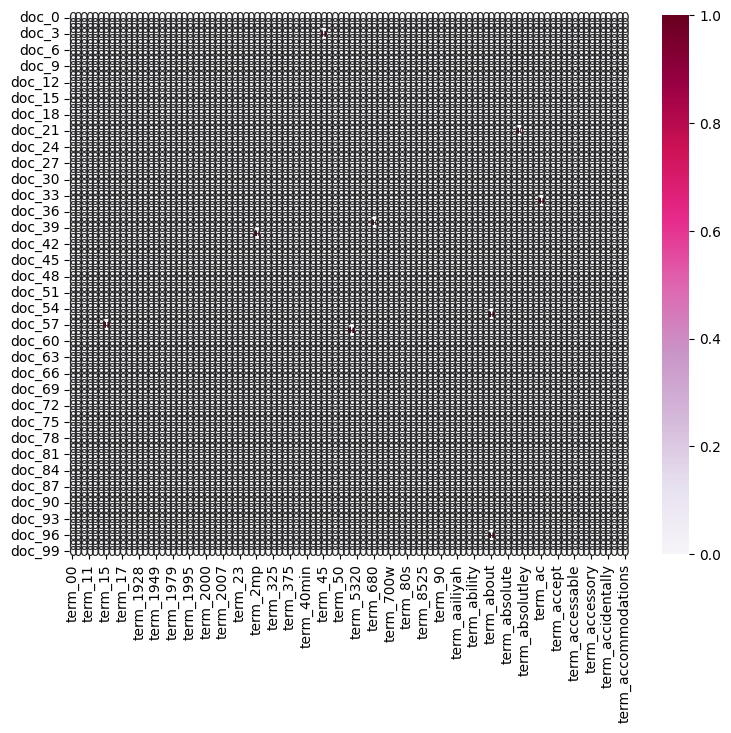

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

,term_45,term_absolutely,term_advise,term_again,term_all,term_and,term_any,term_are,term_as,term_at,...,term_but,term_by,term_case,term_charger,term_charging,term_clicks,term_clip,term_comfortable,term_commercials,term_contacts
doc_0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
doc_7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


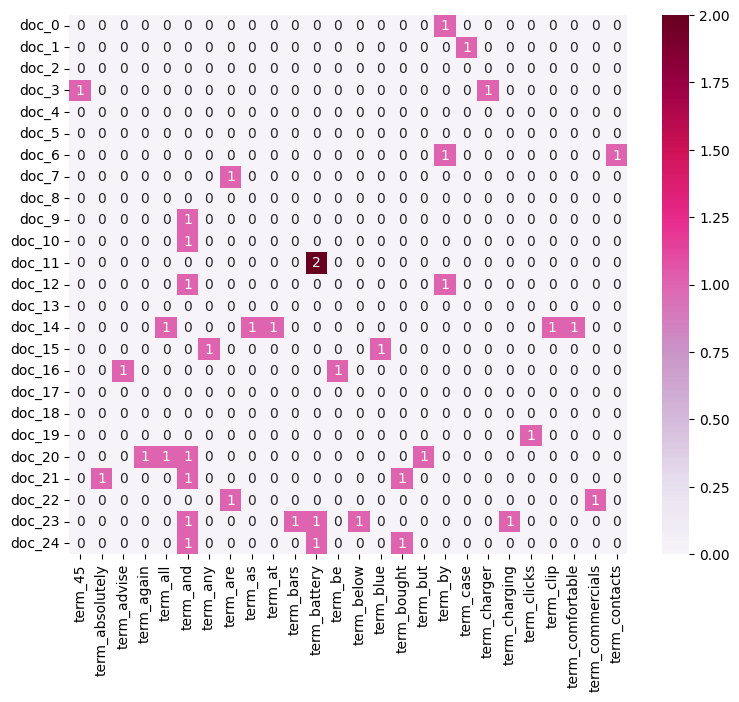

In [40]:
#printing the first terms that existed in first 25 data
numofdoc = 25
terms = 1000
maxfreq = 0

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:numofdoc]]
print(plot_y)
idxx = []
dictofeature = {}
for el in range(terms) :
    temp = X_counts[0:numofdoc, el].toarray()
    if np.any(temp) :
        maxfreq = max([[x for x in temp].append(maxfreq)])
        idxx.append(el)
plot_z = X_counts[0:numofdoc,[x for x in idxx]].toarray() #X_counts[how many documents, how many terms]
print(plot_z)
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[[x for x in idxx]]]
print(plot_x)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=maxfreq, annot=True)

In [41]:
#dimensional reduction
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2983, 5159)
(2983, 2)


Text(0, 0.5, '\nY Label')

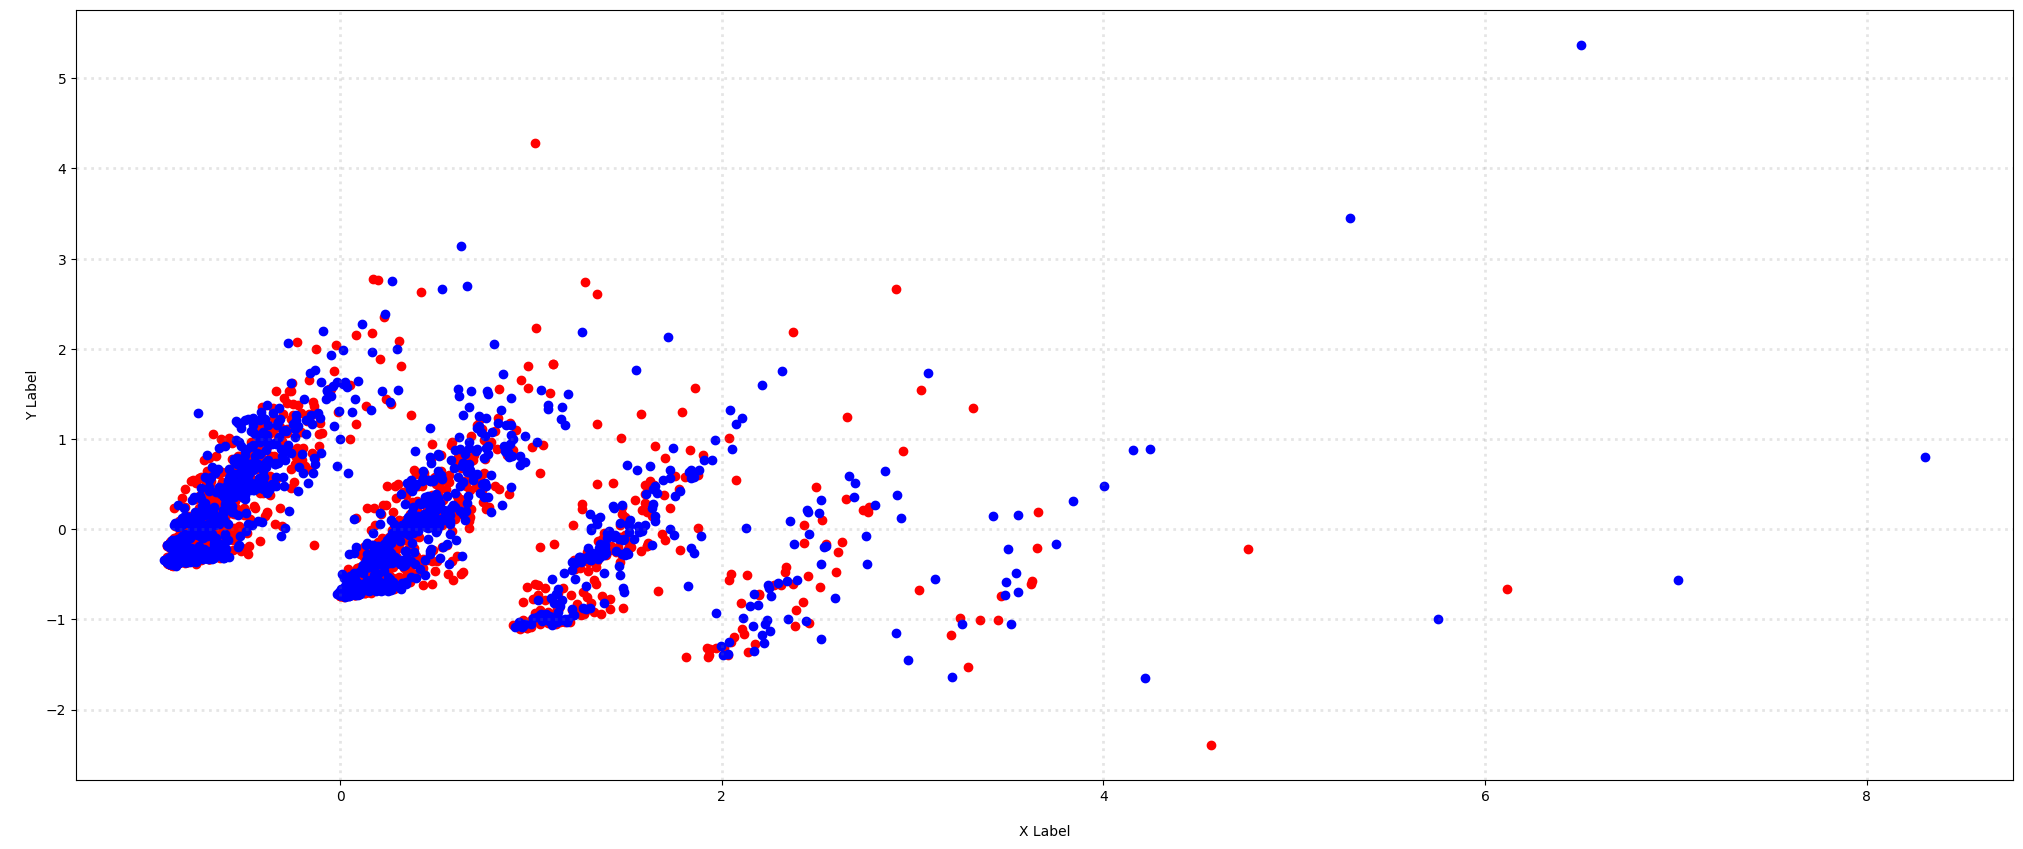

In [42]:
#plot the reduced dimension into 2d
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, fl in zip(col, flag):
    xs = X_reduced[X['flag'] == fl].T[0]
    ys = X_reduced[X['flag'] == fl].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

(2983, 5159)
(2983, 3)


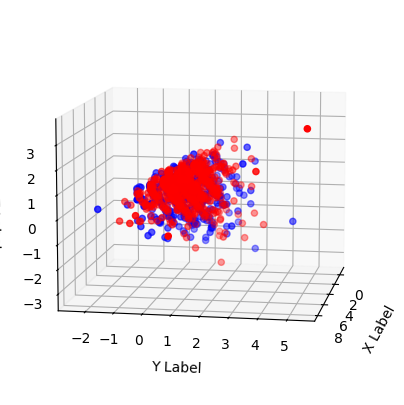

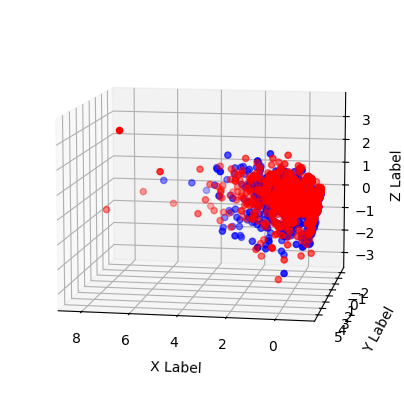

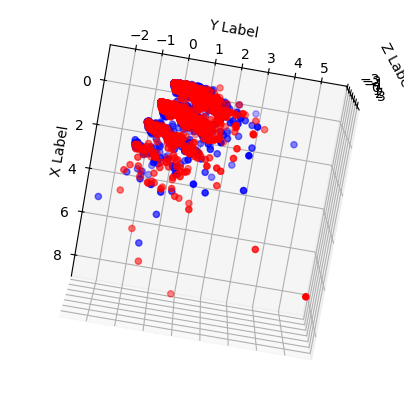

In [43]:
#plot the reduced dimension into 3 3d
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
X_reduced.shape


col = ['blue', 'red']

# plot
fig = plt.figure(figsize=(5,5))
fig2 = plt.figure(figsize=(5,5))
fig3 = plt.figure(figsize=(5,5))

ax = fig.add_subplot(projection = '3d')
ax.view_init(elev=10, azim=10, roll=0)

ay = fig2.add_subplot(projection = '3d')
ay.view_init(elev=10, azim=100, roll=0)

az = fig3.add_subplot(projection = '3d')
az.view_init(elev=100, azim=10, roll=0)
for c, fl in zip(col, flag):
    xs = X_reduced[X['flag'] == fl].T[0]
    ys = X_reduced[X['flag'] == fl].T[1]
    zs = X_reduced[X['flag'] == fl].T[2]

    ax.scatter(xs, ys, zs,  color = c)
    ay.scatter(xs, ys, zs,  color = c)
    az.scatter(xs, ys, zs,  color = c)

# ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')

az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

plt.show()

In [44]:
#aggregation
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [45]:
#visualize using plotly (first 300 token)
import plotly.express as px
x = count_vect.get_feature_names_out()[:300]
y = term_frequencies[:300]
fig = px.bar(x=x,y=y)

fig.show()

In [46]:
#plot them in order of the frequency (first 300 token)
import plotly.express as px
x=count_vect.get_feature_names_out()[:300]
y=term_frequencies[:300]
fig = px.bar(x=x,y=y)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})


fig.show()

C:\Users\Jansen\AppData\Local\Temp\ipykernel_34780\1288557628.py:7: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


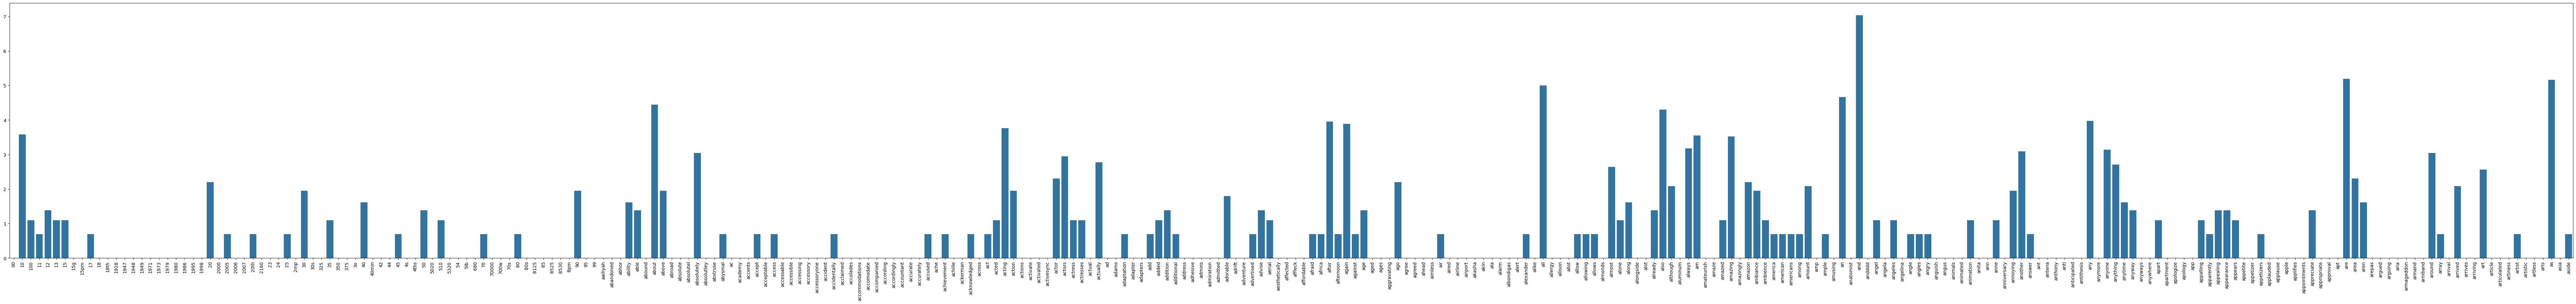

In [47]:
#transform into log distribution (first 300 token)
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)


In [48]:
#Discretization and Binarization
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.flag)
X['bin_flag'] = mlb.transform(X['flag']).tolist()

In [49]:
X

,text,flag,unigrams,analyzed,bin_flag
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0]
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0]
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0]
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0]


## Data Explorazation


In [50]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Jansen\AppData\Local\Temp\ipykernel_34780\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_34780\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_34780\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Jansen\AppData\Local\Temp\ipykernel_34780\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [52]:
print(X['text'][50])
print(X['text'][100])
print(X['text'][150])

Not loud enough and doesn't turn on like it should.
Integrated seamlessly with the Motorola RAZR phone.
I Was Hoping for More.


# 3rd
- Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
- Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
- Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## New Data Visualization

<Axes: title={'center': 'flag distribution of X'}, xlabel='flag'>

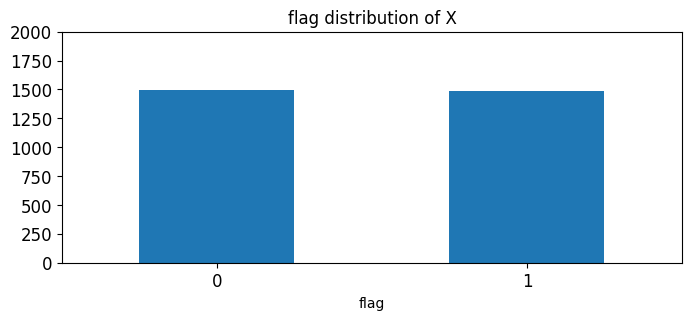

In [60]:
#the differences are so small so we cant really see the differences so we need new way to visualize it
X.flag.value_counts().plot(kind = 'bar',
                                           title = 'flag distribution of X',
                                           ylim = [0, 2000], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'flag distribution of X'}, ylabel='count'>

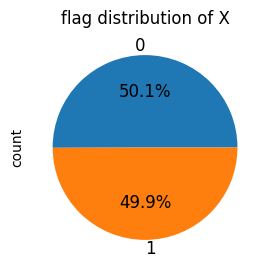

In [65]:
#and i choose pie chart because we can see the difference better in pie chart rather than in bar chart
X.flag.value_counts().plot(kind = 'pie',
                                           title = 'flag distribution of X', 
                                           rot = 0, fontsize = 12, figsize = (8,3),
                                           autopct = '%1.1f%%')

## TF-IDF features

In [53]:
#Feature subset selection/extraction using TdifVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tfid_vect = TfidfVectorizer() #vectorize
X_counts_tfid = tfid_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts_tfid.shape)
print(X_counts_tfid[0])
X

(2983, 5159)
  (0, 1014)	0.39845191493787
  (0, 648)	0.22336356134689328
  (0, 1983)	0.23148898512916666
  (0, 4797)	0.33196418005888045
  (0, 4839)	0.27543498748014605
  (0, 4535)	0.08660911076870992
  (0, 2159)	0.2227447042096017
  (0, 2315)	0.29538473002682736
  (0, 2434)	0.11967341692510161
  (0, 3389)	0.30867885491964087
  (0, 4613)	0.12743843831122717
  (0, 2811)	0.22862480508531938
  (0, 1830)	0.15641093659829974
  (0, 4991)	0.24912534604580203
  (0, 3045)	0.22336356134689328
  (0, 2428)	0.12076100916837491
  (0, 4549)	0.20758334753371457
  (0, 4165)	0.18739563776922355


,text,flag,unigrams,analyzed,bin_flag
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1]
...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0]
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0]
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0]
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0]


In [54]:
#build tfid analyzer
tfid_analyze = tfid_vect.build_analyzer()
X['tfid_analyze'] = X['text'].apply(lambda x: tfid_analyze(x))
print(X_counts_tfid.shape)
X

(2983, 5159)


,text,flag,unigrams,analyzed,bin_flag,tfid_analyze
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...","[so, there, is, no, way, for, me, to, plug, it...",[0],"[so, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]","[good, case, excellent, value]",[1],"[good, case, excellent, value]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]","[great, for, the, jawbone]",[1],"[great, for, the, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...","[tied, to, charger, for, conversations, lastin...",[0],"[tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]","[the, mic, is, great]",[1],"[the, mic, is, great]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,"[I, think, food, should, have, flavor, and, te...","[think, food, should, have, flavor, and, textu...",[0],"[think, food, should, have, flavor, and, textu..."
2996,Appetite instantly gone.,0,"[Appetite, instantly, gone, .]","[appetite, instantly, gone]",[0],"[appetite, instantly, gone]"
2997,Overall I was not impressed and would not go b...,0,"[Overall, I, was, not, impressed, and, would, ...","[overall, was, not, impressed, and, would, not...",[0],"[overall, was, not, impressed, and, would, not..."
2998,"The whole experience was underwhelming, and I ...",0,"[The, whole, experience, was, underwhelming, ,...","[the, whole, experience, was, underwhelming, a...",[0],"[the, whole, experience, was, underwhelming, a..."


In [55]:
tfid_feature = [i for i in tfid_vect.get_feature_names_out()]


In [56]:
tfid_feature


['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [57]:
print(X_counts_tfid)
print("=============")
print(X_counts)
print("=============")
print("=============")
print(tfid_feature)
print("=============")
print(vector_feature)

print(tfid_feature==vector_feature)
if False in (tfid_feature==vector_feature) :
    print("hello")
else :
    print("hi")

  (0, 1014)	0.39845191493787
  (0, 648)	0.22336356134689328
  (0, 1983)	0.23148898512916666
  (0, 4797)	0.33196418005888045
  (0, 4839)	0.27543498748014605
  (0, 4535)	0.08660911076870992
  (0, 2159)	0.2227447042096017
  (0, 2315)	0.29538473002682736
  (0, 2434)	0.11967341692510161
  (0, 3389)	0.30867885491964087
  (0, 4613)	0.12743843831122717
  (0, 2811)	0.22862480508531938
  (0, 1830)	0.15641093659829974
  (0, 4991)	0.24912534604580203
  (0, 3045)	0.22336356134689328
  (0, 2428)	0.12076100916837491
  (0, 4549)	0.20758334753371457
  (0, 4165)	0.18739563776922355
  (1, 4865)	0.633627682893175
  (1, 1604)	0.47208678028809276
  (1, 714)	0.512627326445873
  (1, 1994)	0.3359512695758188
  (2, 2451)	0.8223576509783525
  (2, 2024)	0.40205777854454006
  (2, 4535)	0.1950221671536334
  :	:
  (2982, 1388)	0.29330938809811624
  (2982, 5114)	0.29330938809811624
  (2982, 3439)	0.29330938809811624
  (2982, 3860)	0.26883783193000615
  (2982, 2069)	0.27899444540548035
  (2982, 589)	0.2443662757618960

## Naive Bayes

In [74]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

bayes_classifier = MultinomialNB()

In [75]:
bayes_classifier.fit(X_counts_tfid, X['flag'])
X_test_tfid = tfid_vect.fit_transform(X.text)
temp = bayes_classifier.predict(X_test_tfid)

temp2 = X['flag']

print(temp)
print(metrics.accuracy_score(temp2, temp))
print(metrics.classification_report(temp2, temp,
                                            target_names=['Positive', 'Negative']))
    

['0' '1' '1' ... '0' '0' '0']
0.953402614817298
              precision    recall  f1-score   support

    Positive       0.94      0.97      0.95      1493
    Negative       0.97      0.93      0.95      1490

    accuracy                           0.95      2983
   macro avg       0.95      0.95      0.95      2983
weighted avg       0.95      0.95      0.95      2983



In [76]:
bayes_classifier.fit(X_counts, X['flag'])
X_test_vect =  count_vect.fit_transform(X.text)
temp = bayes_classifier.predict(X_test_vect)

temp2 = X['flag']

print(temp)
print(metrics.accuracy_score(temp2, temp))
print(metrics.classification_report(temp2, temp,
                                            target_names=['Positive', 'Negative']))

['0' '1' '1' ... '0' '0' '0']
0.9453570231310761
              precision    recall  f1-score   support

    Positive       0.93      0.97      0.95      1493
    Negative       0.97      0.92      0.94      1490

    accuracy                           0.95      2983
   macro avg       0.95      0.95      0.95      2983
weighted avg       0.95      0.95      0.95      2983



## Inefficient Part

Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

1. I dont think in 5.6 Discretization and Binarization is meaning full for every dataset, because in the lab and hw we dont realy need to create it because it is not being used
2. There are alot of plotting in the lab which for me is not meaning full to plot a dataset with multiple plot, we can just choose one method that suitable with out dataset